In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def scatterplotmatrix(plt, points, labels):
    plt.figure(figsize = (5 * points.shape[1],) * 2, dpi = 300)
    for i in range(dimensions):
        for j in range(dimensions):
            axes = plt.subplot(dimensions, dimensions, i * dimensions + j + 1)
      
            if axes.is_first_row():
                if j % 2 == 1:
                    axes.xaxis.set_ticks_position('top')
                else:
                    axes.xaxis.set_visible(False)
            elif axes.is_last_row():
                if j % 2 == 1:
                    axes.xaxis.set_visible(False)
                else:
                    axes.xaxis.set_ticks_position('bottom')
            else:
                axes.xaxis.set_visible(False)
                
            if axes.is_first_col():
                if i % 2 == 1:
                    axes.yaxis.set_ticks_position('left')
                else:
                    axes.yaxis.set_visible(False)
            elif axes.is_last_col():
                if i % 2 == 1:
                    axes.yaxis.set_visible(False)
                else:
                    axes.yaxis.set_ticks_position('right')
            else:
                axes.yaxis.set_visible(False)
                
            if j == i:
                plt.annotate(i, (0.5, 0.5), xycoords = 'axes fraction', ha = 'center', va = 'center')
                continue

            plt.scatter(points[:, i], points[:, j], c = plt.cm.rainbow(np.interp(labels, [0, np.max(labels)], [0, 1])), lw = 0)

    plt.subplots_adjust(wspace = 0, hspace = 0)

In [36]:
seeds = 20
dimensions = 5

points = []
true_labels = []
for true_label, center in enumerate(np.random.uniform(-20, +20, size = (seeds, dimensions))):
    for offset in np.random.normal(0, np.random.uniform(0.5, 2), size = (int(np.random.uniform(20, 50)), dimensions)):
        points.append(center + offset)
        true_labels.append(true_label)
points = np.vstack(points)
true_labels = np.array(true_labels)
        
scatterplotmatrix(plt, points, true_labels)
plt.show()

0.32365145228215769

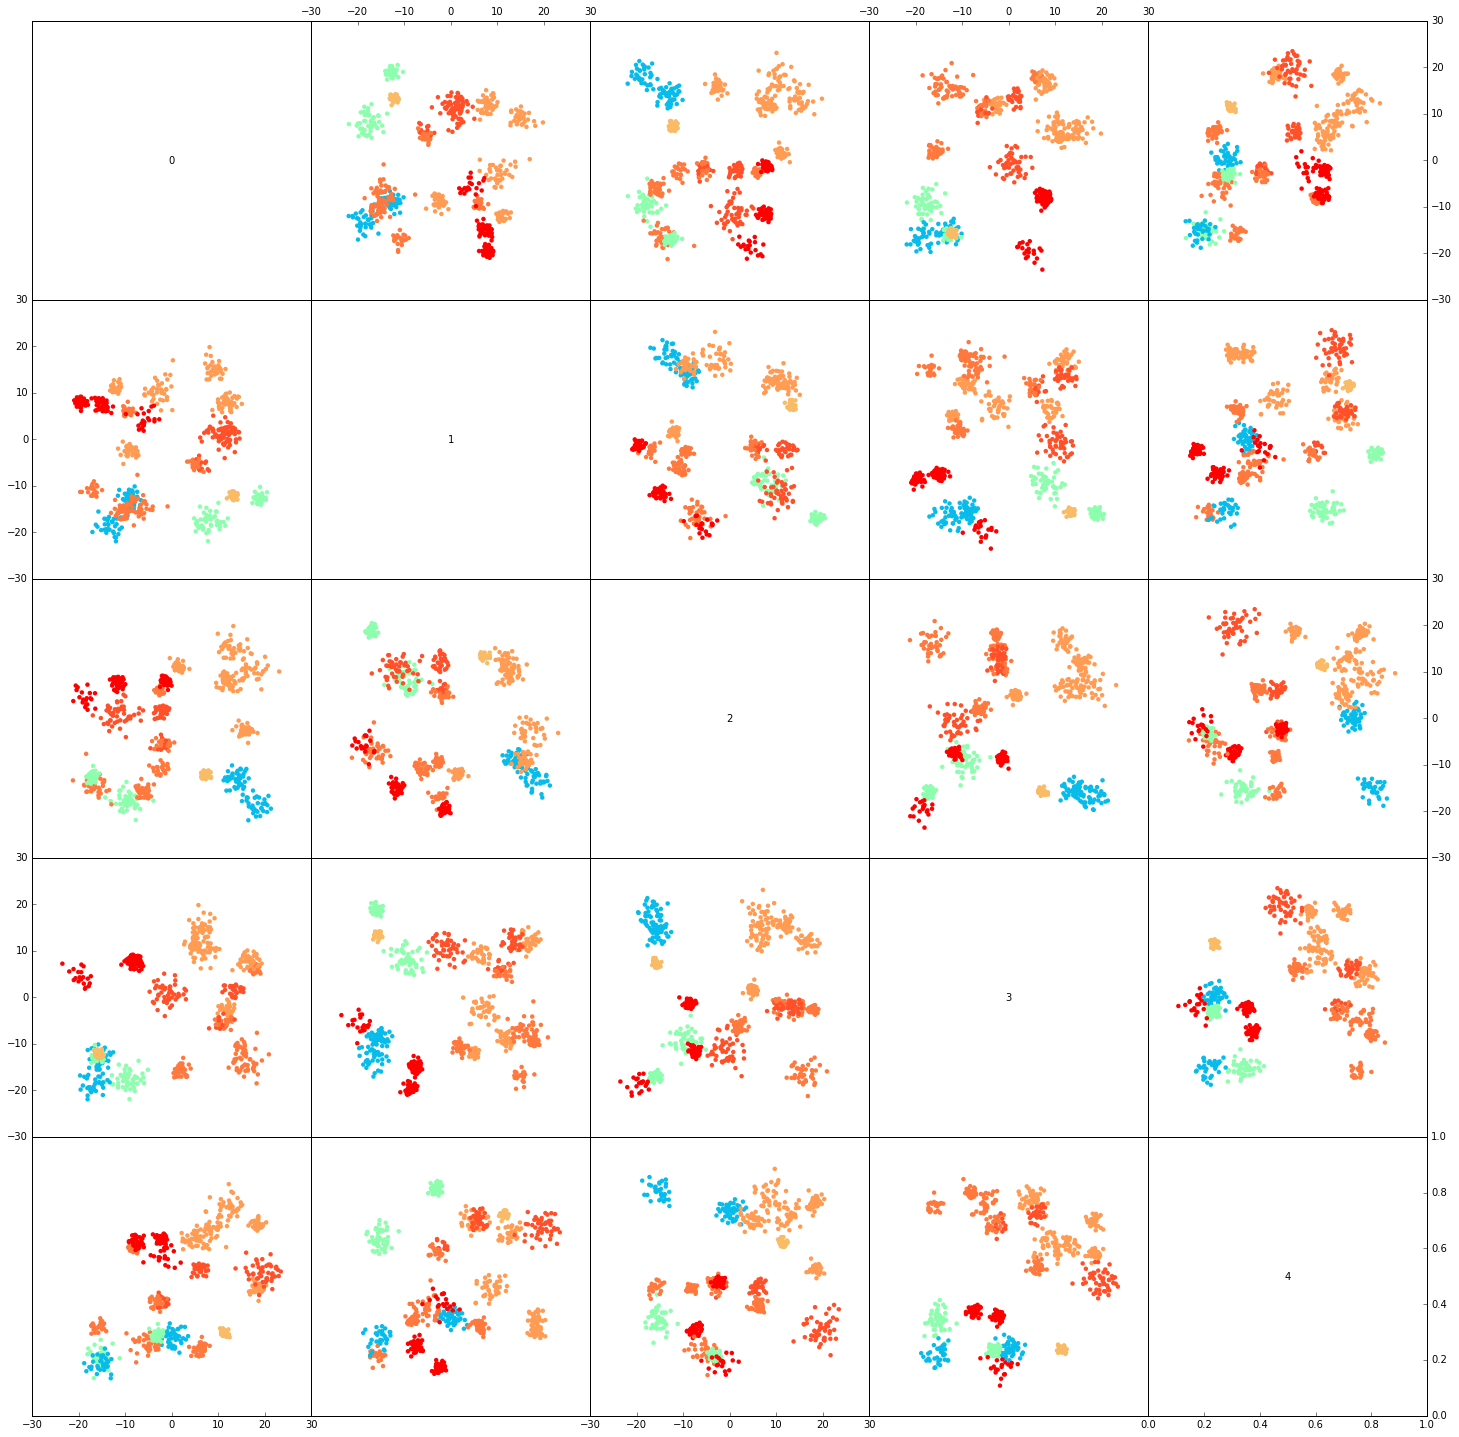

In [37]:
from sklearn.cluster import MeanShift

clusterizer = MeanShift(bandwidth = 20)
clusterizer_labels = clusterizer.fit_predict(points)
clusterizer_labels = np.vectorize(dict(zip(clusterizer_labels, true_labels)).get)(clusterizer_labels)

scatterplotmatrix(plt, points, clusterizer_labels)

from sklearn.metrics import accuracy_score
accuracy_score(true_labels, clusterizer_labels)

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')

from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, points, clusterizer_labels).mean()

0.9087539920396428